In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(gridtext))

In [22]:
df <- read_excel("mmc4.xlsx", sheet = "Corr_Enzymes_IGP")

# Convert the data frame to a matrix
df <- as.data.frame(df)
mat <- as.matrix(df[, -1])  # Exclude the first column (gene names)

anno_df <- read_excel("mmc4.xlsx", sheet = "Glycoprotein_vs_IGP")
# name = anno_df$Gene + "-" anno_df$Peptide + "-" + anno_df$Glycan
anno_df$name <- paste(anno_df$Gene, anno_df$Peptide, anno_df$Glycan, sep = "-")
anno_df2 <- read_excel("mmc4.xlsx", sheet = "Glycosylation_enzyme_protein")
head(anno_df2)

Gene,Pathway,DDA_Tumor_vs_NAT_log2FC,DDA_Tumor_vs_NAT_adjP,DDA_ES_vs_NAT_log2FC,DDA_ES_vs_NAT_adjP,DDA_Tumor_vs_ND_log2FC,DDA_Tumor_vs_ND_adjP,DDA_ES_vs_ND_log2FC,DDA_ES_vs_ND_adjP,DIA_Tumor_vs_NAT_log2FC,DIA_Tumor_vs_NAT_adjP,DIA_ES_vs_NAT_log2FC,DIA_ES_vs_NAT_adjP,DIA_Tumor_vs_ND_log2FC,DIA_Tumor_vs_ND_adjP,DIA_ES_vs_ND_log2FC,DIA_ES_vs_ND_adjP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABO,Capping,-0.6908446,1.286504e-01,-0.6639240,2.058081e-01,-1.371673,0.0017914374,-1.3447520,0.0034494166,NA,NA,NA,NA,NA,NA,NA,NA
ALG1,Precursor,-0.3803514,8.567962e-04,-0.3371031,1.053925e-02,-1.012092,0.0004503490,-0.9688434,0.0010990525,-0.96815510,2.109339e-05,-0.88880220,5.793918e-05,-1.3668347,0.002742177,-1.2874818,0.001210297
ALG11,Precursor,-0.6953078,8.262851e-06,-0.6891198,5.352212e-05,-0.968962,0.0001266374,-0.9627740,0.0001900410,NA,NA,NA,NA,NA,NA,NA,NA
ALG12,Precursor,-1.0101412,2.020019e-04,-1.0141265,6.231747e-04,-1.011598,0.0001843440,-1.0155838,0.0003092581,NA,NA,NA,NA,NA,NA,NA,NA
ALG13,Precursor,-1.2841934,1.134986e-10,-1.2391542,1.080895e-08,-1.554981,0.0001331841,-1.5099422,0.0001992509,0.03975145,9.539959e-01,0.02027685,9.878732e-01,0.5776223,0.586396930,0.5581477,0.492366836
ALG14,Precursor,-1.8389536,1.198753e-07,-1.8018118,2.662778e-06,-1.917648,0.0002315224,-1.8805066,0.0001891615,NA,NA,NA,NA,NA,NA,NA,NA


In [18]:
head(df)

,Glyco_enzymes,EMILIN1-LEDRFNSTLGPSEEQEESWPGAPGGLSHWLPAAR-N4H5F1S1G0,CLU-EDALNETR-N4H5F0S2G0,SERPINA1-ADTHDEILEGLNFNLTEIPEAQIHEGFQELLR-N6H6F0S3G0,CP-ELHHLQEQNVSNAFLDK-N6H3F3S0G0,FBLN2-DVDECALGTHNCSEAETCHNIQGSFR-N4H6F0S0G0,ATRN-MPSQAPTGNFYPQPLLNSSMCLEDSR-N4H5F1S2G0,PSAP-TNSTFVQALVEHVK-N3H4F1S1G0,CEACAM5-LQLSNGNR-N5H6F2S0G0,HP-VVLHPNYSQVDIGLIK-N6H7F0S1G0,⋯,BST1-DSSGVIHVMLNGSEPTGAYPIK-N2H7F0S0G0,PTPRC-YHLEVEAGNTLVRNESHK-N5H6F1S2G0,DSG2-INATDADEPNTLNSK-N5H4F2S0G0,LGALS3BP-DAGVVCTNETR-N3H4F1S0G0,CREG1-VNETEMDIAK-N2H8F0S0G0,GAA-GVFITNETGQPLIGK-N2H7F0S0G0,GAA-GVFITNETGQPLIGK-N2H8F0S0G0,PTPRC-NIETFTCDTQNITYR-N4H5F1S1G0,THBS1-VVNSTTGPGEHLR-N4H4F1S0G0,COL6A1-NFTAADWGQSR-N5H5F1S0G0
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALG5,0.10222481,-0.10815025,-0.01411472,0.07933586,0.02916081,0.03472942,0.05794069,0.19461375,0.15203361,⋯,-0.02716831,0.05176659,-0.14783616,-0.005277494,-0.1605641,-0.17410848,-0.17709104,-0.07678638,-0.027025356,0.140543782
2,DPM1,0.14450786,-0.14532753,-0.02400632,-0.09112780,0.01368964,0.11735434,0.05590674,0.13050521,0.03283595,⋯,-0.10597750,-0.03672815,-0.19910110,-0.049387130,-0.2497210,-0.19732437,-0.12901719,-0.07444650,0.007384045,-0.073370652
3,DPM3,0.09871542,-0.03971502,-0.19451412,-0.17890494,-0.08146357,0.04473803,-0.20933068,0.09502134,-0.26028598,⋯,0.26947193,0.38476074,0.08954466,0.143638451,0.0487696,0.08386579,-0.03453698,0.30800543,0.143961302,0.008864646
4,DPAGT1,0.24888346,0.25485661,0.14128893,-0.08953824,-0.04992418,-0.04739918,-0.01255442,0.21178750,-0.12097885,⋯,-0.01580390,0.23732517,-0.08852159,-0.029540690,-0.1223162,-0.01063076,-0.16091503,0.29473684,0.254172529,0.115878147
5,ALG13,0.09926616,-0.13125443,0.06395664,0.10545309,0.13708392,-0.01475223,0.08580626,0.15553306,0.08903908,⋯,-0.21994843,-0.25815369,-0.14721527,-0.153898536,-0.1446625,-0.20293677,-0.23485504,-0.10560533,-0.217513915,-0.042563620
6,ALG14,0.15041209,-0.21151134,-0.20964361,-0.04200156,0.05342276,-0.01717209,0.16068202,0.24352941,0.25464076,⋯,0.14466403,-0.12582345,-0.16293415,-0.131372549,-0.1535267,-0.08010133,-0.23403964,0.12825984,0.234962103,0.129298552


In [24]:
anno_df <- read_excel("mmc4.xlsx", sheet = "Glycoprotein_vs_IGP")
# name = anno_df$Gene + "-" anno_df$Peptide + "-" + anno_df$Glycan
anno_df$name <- paste(anno_df$Gene, anno_df$Peptide, anno_df$Glycan, sep = "-")

# Get Column names of df from 2nd
dfnames <- colnames(df)[-1]
annames <- anno_df$name

absent <- setdiff(dfnames, annames)
# Remove the absent columns from the matrix
mat <- mat[, !colnames(mat) %in% absent]
 
# Order anno_df to match the columns of mat
anno_df <- anno_df %>%
  filter(name %in% colnames(mat)) %>%
  arrange(match(name, colnames(mat)))

anno_df2 <- anno_df2 %>%
  filter(Gene %in% df$Glyco_enzymes) %>%
  arrange(match(Gene, df$Glyco_enzymes))
# # Set absent to NA
# anno_df <- anno_df %>%
#   mutate(
#     name = ifelse(name %in% absent, name, name),
#     Gene = ifelse(name %in% absent, NA, NA),
#     Peptide = ifelse(name %in% absent, NA, NA),
#     Glycan = ifelse(name %in% absent, NA, NA),
#     IGP_FC = ifelse(name %in% absent, NA, NA),
#     IGP_T = ifelse(name %in% absent, NA, NA),
#     Protein_FC = ifelse(name %in% absent, NA, NA),
#     Protein_T = ifelse(name %in% absent, NA, NA),
#     is_HM = ifelse(name %in% absent, NA, NA),
#     is_F = ifelse(name %in% absent, NA, NA),
#     is_S = ifelse(name %in% absent, NA, NA)
#   )

head(anno_df2)


Gene,Pathway,DDA_Tumor_vs_NAT_log2FC,DDA_Tumor_vs_NAT_adjP,DDA_ES_vs_NAT_log2FC,DDA_ES_vs_NAT_adjP,DDA_Tumor_vs_ND_log2FC,DDA_Tumor_vs_ND_adjP,DDA_ES_vs_ND_log2FC,DDA_ES_vs_ND_adjP,DIA_Tumor_vs_NAT_log2FC,DIA_Tumor_vs_NAT_adjP,DIA_ES_vs_NAT_log2FC,DIA_ES_vs_NAT_adjP,DIA_Tumor_vs_ND_log2FC,DIA_Tumor_vs_ND_adjP,DIA_ES_vs_ND_log2FC,DIA_ES_vs_ND_adjP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALG5,Precursor,-1.6280363,7.150132e-11,-1.5927123,4.752186e-09,-2.1969803,0.0001449550,-2.16165625,0.0002058892,-2.36585681,2.277986e-06,-2.18835241,7.767194e-06,-3.0572381,0.0008919583,-2.8797337,0.0003792445
DPM1,Precursor,-0.6464003,2.153254e-06,-0.5867131,2.210692e-05,-1.3823175,0.0002822819,-1.32263029,0.0004668123,-1.49368963,3.964620e-08,-1.47563830,3.056122e-08,-1.3443502,0.0026549399,-1.3262989,0.0016106697
DPM3,Precursor,0.3663862,6.638319e-02,0.4615356,7.995120e-02,-0.1683825,0.3009139018,-0.07323314,0.4227926037,NA,NA,NA,NA,NA,NA,NA,NA
DPAGT1,Precursor,-1.3904950,1.692801e-05,-1.3193577,9.267583e-05,-1.3986971,0.0005332798,-1.32755972,0.0004667062,NA,NA,NA,NA,NA,NA,NA,NA
ALG13,Precursor,-1.2841934,1.134986e-10,-1.2391542,1.080895e-08,-1.5549815,0.0001331841,-1.50994225,0.0001992509,0.03975145,9.539959e-01,0.02027685,9.878732e-01,0.5776223,0.5863969300,0.5581477,0.4923668362
ALG14,Precursor,-1.8389536,1.198753e-07,-1.8018118,2.662778e-06,-1.9176484,0.0002315224,-1.88050659,0.0001891615,NA,NA,NA,NA,NA,NA,NA,NA


`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



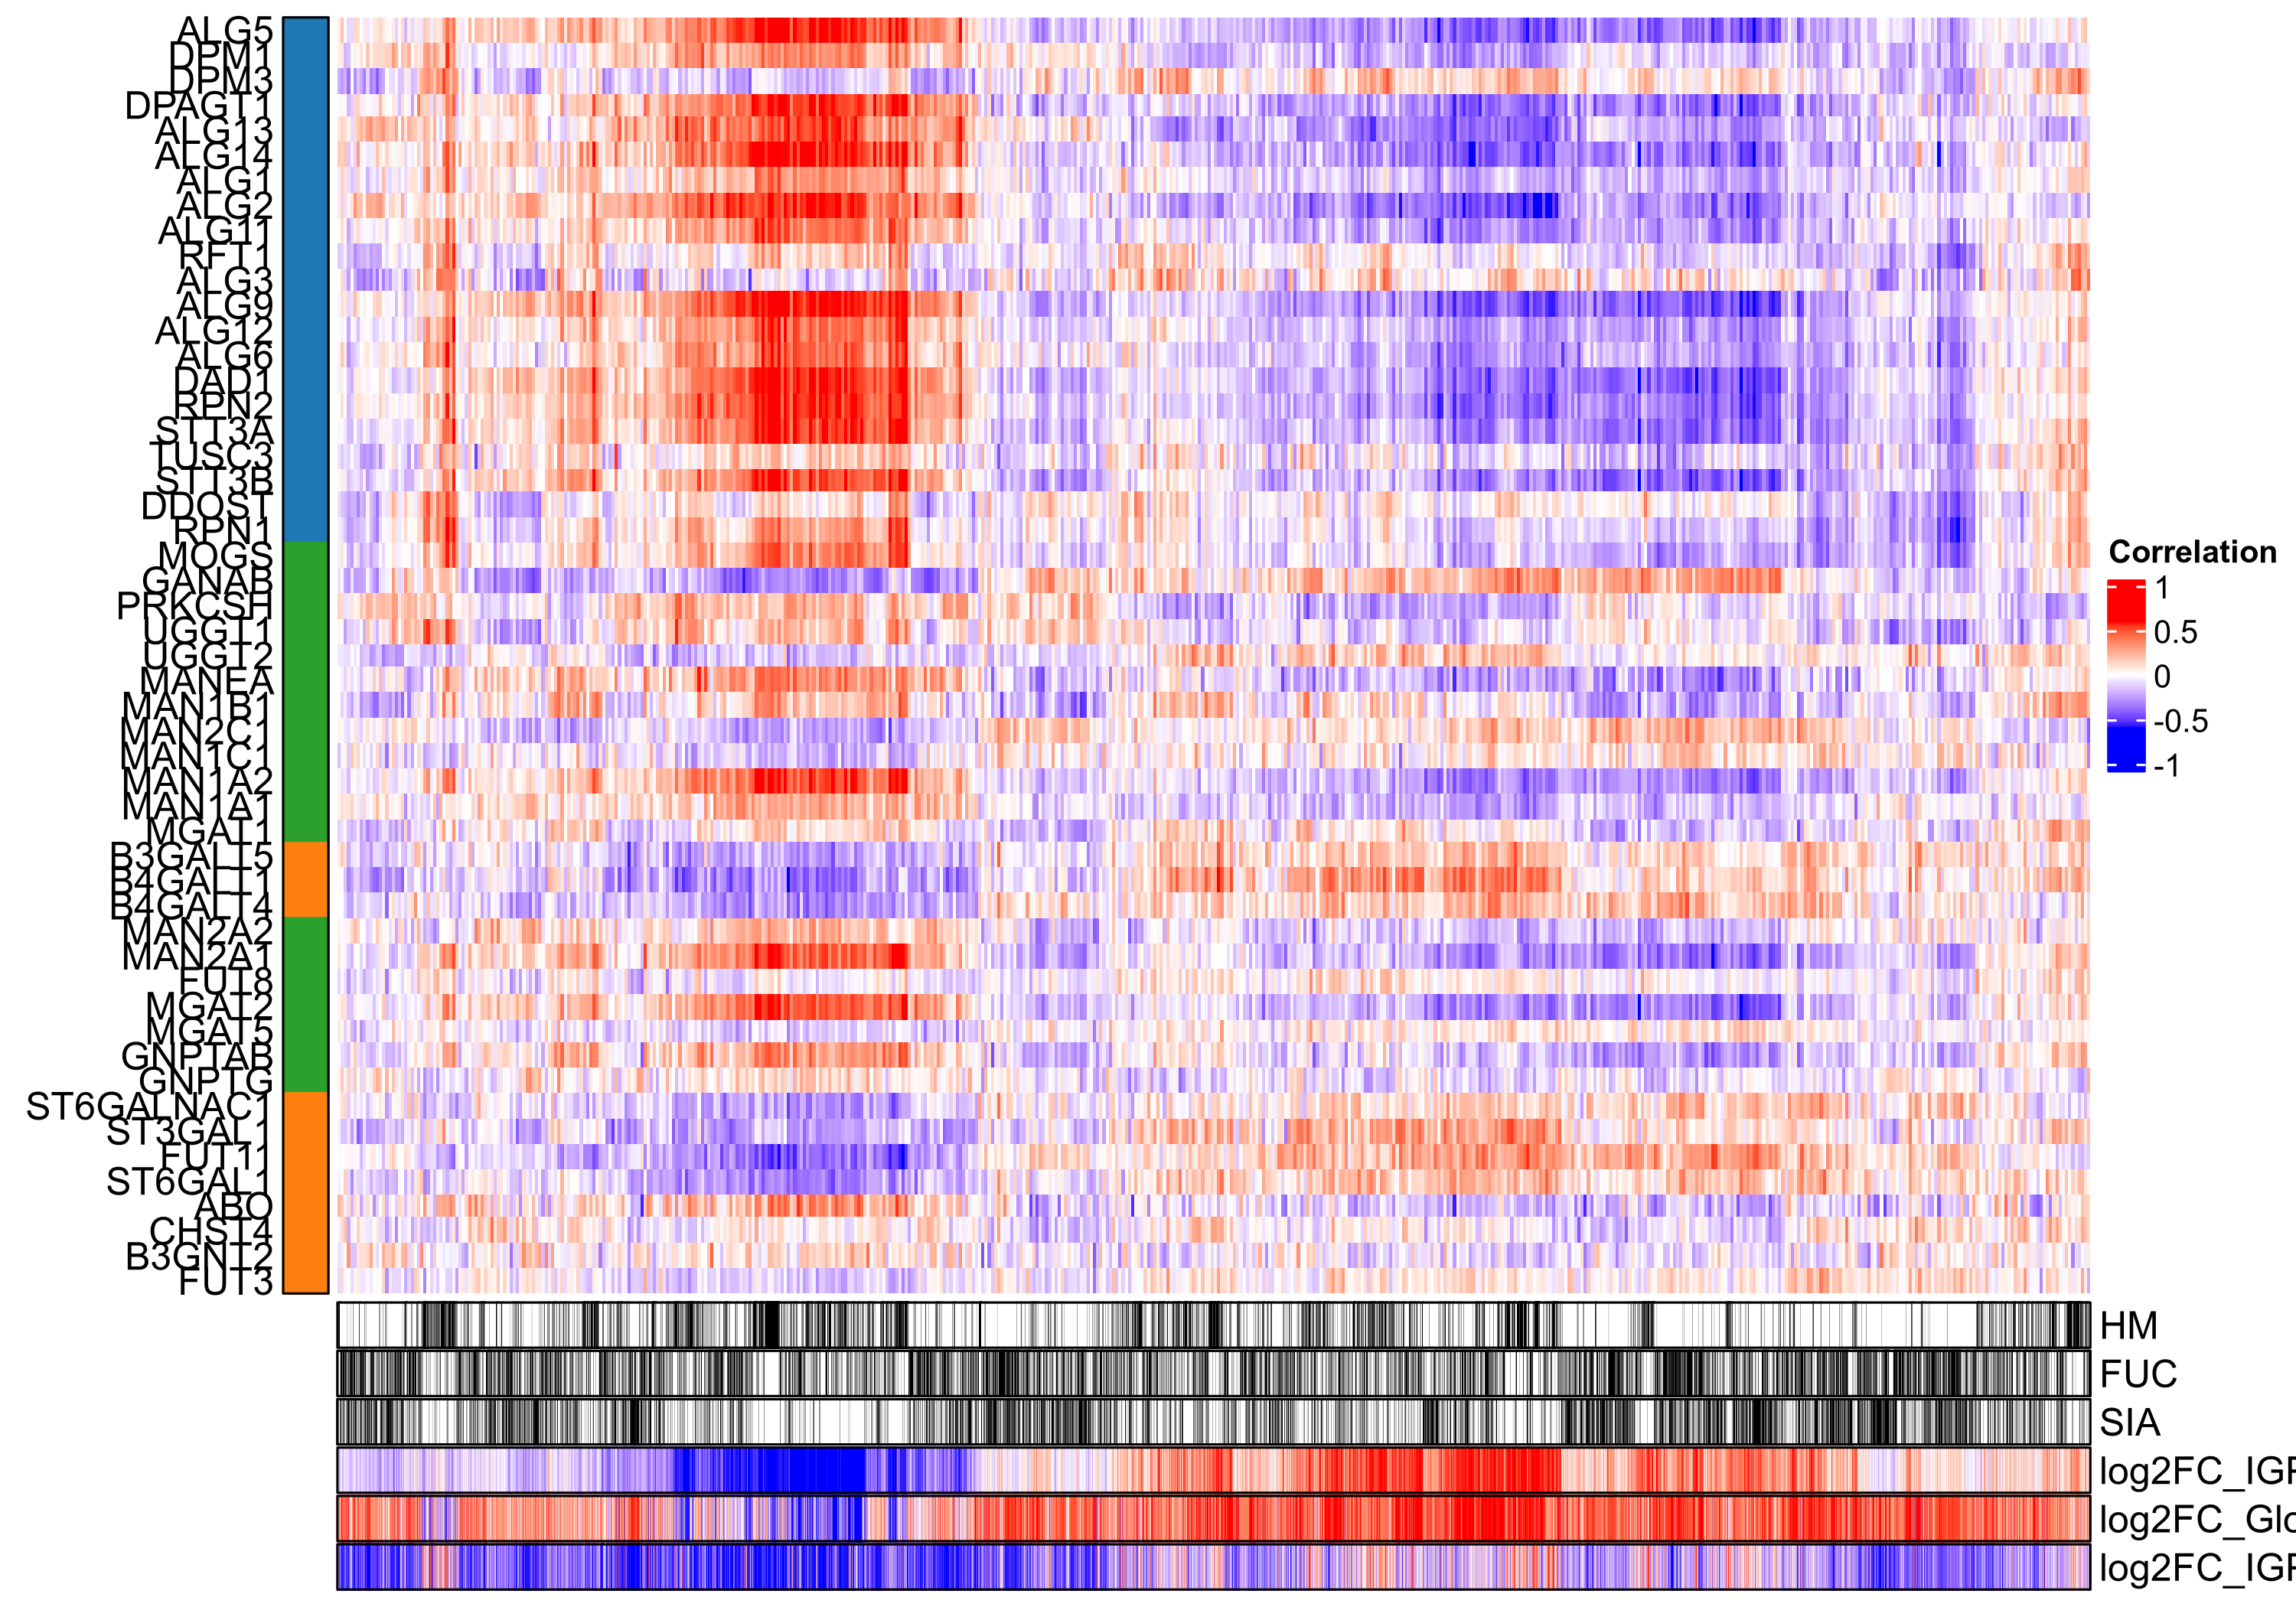

In [47]:
options(repr.plot.width=10, repr.plot.height=7, repr.plot.res = 300)
cor_col_fun <- colorRamp2(c(-0.6, 0, 0.6), c("blue", "white", "red"))
log2fc_col_fun <- colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
simple_col <- colorRamp2(c(0, 1), c("white", "black"))
pathway_col <- c("Precursor" = "#1f77b4", "Capping" = "#ff7f0e", "Trimming"= "#2ca02c")
anno <- HeatmapAnnotation(
  HM = anno_simple(anno_df$is_HM, na_col = "white", col = simple_col, border = TRUE),
  FUC = anno_simple(anno_df$is_F, na_col = "white", col = simple_col, border = TRUE),
  SIA = anno_simple(anno_df$is_S, na_col = "white", col = simple_col, border = TRUE),
  log2FC_IGP = anno_simple(x = anno_df$IGP_FC, col = log2fc_col_fun, na_col = "white", border = TRUE),
  log2FC_Global = anno_simple(x = anno_df$Protein_FC, col = log2fc_col_fun, na_col = "white", border = TRUE),
  log2FC_IGP_GLOBAL = anno_simple(x = (anno_df$IGP_FC - anno_df$Protein_FC), col = log2fc_col_fun, na_col = "white", border = TRUE),
  
  show_legend = c(TRUE, FALSE, FALSE, 
                  TRUE, FALSE, FALSE),
  col = list(
    log2FC_IGP = log2fc_col_fun, log2FC_Global = log2fc_col_fun, log2FC_IGP_GLOBAL = log2fc_col_fun

  )
)

anno2 <- rowAnnotation(
  Pathway = anno_simple(x = anno_df2$Pathway, col = pathway_col, na_col = "white", border = TRUE),
  show_annotation_name = FALSE
  # col = list(Pathway = pathway_col),
  )
ht <- Heatmap(
  mat,
  bottom_annotation = anno,
  left_annotation = anno2,
  name = "Correlation",
  col = cor_col_fun,
  row_labels = df$Glyco_enzymes,  # Use the first column as row labels
  cluster_rows = FALSE,       # or FALSE if you want to keep order
  cluster_columns = FALSE,    # same here
  row_names_side = "left",
  show_row_names = TRUE,
  show_column_names = FALSE,
  column_names_rot = 45
)

# decorate_heatmap_body("Correlation", {
#     grid.text("Glycoenzymes")
# })

draw(ht)